This code creates a simulation of a flow meter sensor with a range between 0-200.  There is 0.1% outliers in the data.  It also has data where there is no flow, where the value is 0.  If the meter fails, it goes to 500.

Python script that generates flow meter time series data with all your specified requirements. Here's what the code does:

1. Generates 2000 data points with 5-minute intervals
2. Base flow rate follows a normal distribution centered at 100 GPM with values clipped between 0-200 GPM
3. Includes meter off periods (0 readings) for 10+ consecutive points
4. Includes meter failure periods (1000 readings) for 5-50 consecutive points
5. Adds 0.5% outliers (10 points) with values between 250-900 GPM
6. Saves the data to a CSV file

The data includes:

* Timestamp column
* Flow rate column
* Random but realistic variations in normal operation
* Multiple meter off and failure periods
* Properly distributed outliers

In [ ]:

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [11]:
def generate_flow_meter_data(n_points=2000, interval_minutes=5):
    # Set random seed for reproducibility
    np.random.seed(1976)
    
    # Generate base flow data (normal distribution around 100 GPM with std dev of 30)
    flow_data = np.random.normal(100, 30, n_points)
    
    # Clip values between 0 and 200 GPM
    flow_data = np.clip(flow_data, 0, 200)
    
    # Generate timestamps
    start_time = datetime(2024, 1, 1)
    timestamps = [start_time + timedelta(minutes=i*interval_minutes) for i in range(n_points)]
    
    # Create DataFrame
    df = pd.DataFrame({
        'timestamp': timestamps,
        'flow_rate': flow_data
    })
    
    # Add meter off periods (0 readings for 10+ consecutive points)
    n_off_periods = np.random.randint(3, 6)  # 3-5 off periods
    for _ in range(n_off_periods):
        start_idx = np.random.randint(0, n_points - 20)
        duration = np.random.randint(10, 50)  # 10-50 points
        df.loc[start_idx:start_idx + duration, 'flow_rate'] = 0
    
    # Add meter failure periods (500 readings for 5-50 consecutive points)
    n_failure_periods = np.random.randint(2, 4)  # 2-3 failure periods
    for _ in range(n_failure_periods):
        start_idx = np.random.randint(0, n_points - 51)
        duration = np.random.randint(5, 101)  # 5-50 points
        df.loc[start_idx:start_idx + duration, 'flow_rate'] = 500
    
    # Add outliers (0.5% of data points)
    n_outliers = int(n_points * 0.005)  # 0.5% of points
    outlier_indices = np.random.choice(
        df.index[df['flow_rate'].between(0, 200)],  # Only select from normal readings
        size=n_outliers,
        replace=False
    )
    # Generate outliers between -10 and 300
    df.loc[outlier_indices, 'flow_rate'] = np.random.uniform(-10, 300, n_outliers)
    
    return df

# Generate the data
flow_data = generate_flow_meter_data()

# Print basic statistics and first few rows
print("\nDataset Statistics:")
print(f"Total points: {len(flow_data)}")
print(f"Number of zeros (meter off): {len(flow_data[flow_data['flow_rate'] == 0])}")
print(f"Number of failures (500): {len(flow_data[flow_data['flow_rate'] == 500])}")
print(f"Number of outliers (>200, <500): {len(flow_data[(flow_data['flow_rate'] > 200) & (flow_data['flow_rate'] < 500)])}")

# Save to CSV
_date = datetime.today()  #create the todays date
_date = _date.strftime("%Y%m%d")

title = 'simulated_data_basic_flow_meter_' + _date + ".csv" #create title

flow_data.to_csv(title, index=False)
print("\nFirst few rows of the dataset:")
print(flow_data.head())



Dataset Statistics:
Total points: 2000
Number of zeros (meter off): 63
Number of failures (500): 144
Number of outliers (>200, <500): 2

First few rows of the dataset:
            timestamp   flow_rate
0 2024-01-01 00:00:00   89.480059
1 2024-01-01 00:05:00  145.479893
2 2024-01-01 00:10:00  126.553333
3 2024-01-01 00:15:00   80.167604
4 2024-01-01 00:20:00   93.858660


'20250219'

In [44]:
flow_data

,timestamp,flow_rate
0,2024-01-01 00:00:00,89.480059
1,2024-01-01 00:05:00,145.479893
2,2024-01-01 00:10:00,126.553333
3,2024-01-01 00:15:00,80.167604
4,2024-01-01 00:20:00,93.858660
...,...,...
1995,2024-01-07 22:15:00,119.502040
1996,2024-01-07 22:20:00,88.690286
1997,2024-01-07 22:25:00,92.226058
1998,2024-01-07 22:30:00,153.713038


Plot the data 

(array([19723., 19724., 19725., 19726., 19727., 19728., 19729., 19730.]),
 [Text(19723.0, 0, '2024-01-01'),
  Text(19724.0, 0, '2024-01-02'),
  Text(19725.0, 0, '2024-01-03'),
  Text(19726.0, 0, '2024-01-04'),
  Text(19727.0, 0, '2024-01-05'),
  Text(19728.0, 0, '2024-01-06'),
  Text(19729.0, 0, '2024-01-07'),
  Text(19730.0, 0, '2024-01-08')])

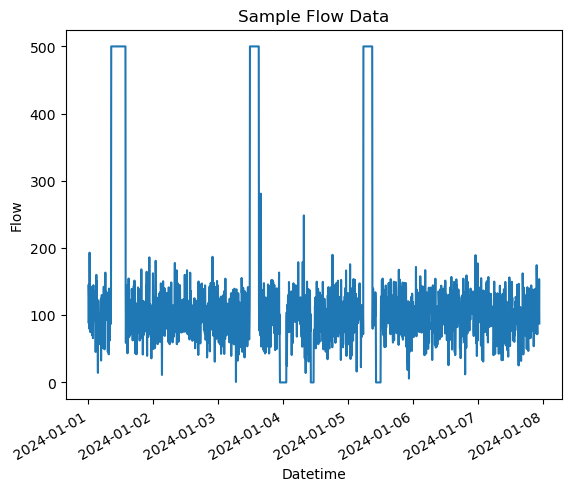

In [45]:
plt.plot(flow_data.timestamp, flow_data.flow_rate)

#add title and labels
plt.title("Sample Flow Data")
plt.xlabel("Datetime")
plt.ylabel("Flow")


#adjust ticks on x-axis for readability
plt.xticks(rotation=30, ha='right')

In [46]:
flow_data.describe()

,timestamp,flow_rate
count,2000,2000.000000
mean,2024-01-04 11:17:30,125.965399
min,2024-01-01 00:00:00,0.000000
25%,2024-01-02 17:38:45,79.638218
50%,2024-01-04 11:17:30,102.578480
75%,2024-01-06 04:56:15,125.269860
max,2024-01-07 22:35:00,500.000000
std,NaN,109.327366
